#### KARIITHI ANNE WANJIKU
##### kariithiwanjiku3@gmail.com

### Malaria Classification model

**Task**
TensorFlow is an open-source machine learning framework developed by Google for the sole purpose of building and training machine learning models.

One of the datasets under the Tensorflow Image libraries is a malaria dataset. Using this dataset, we would like you to create a model which is able to classify whether a blood smear is uninfected or parasitized.

**Abstract**
TensorFlow Datasets has many datasets that can be loaded and be used to learn more about image classification and various computer vision machine learning pipelines. One of the datasets hosted here is the "Malaria Dataset".

The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.

**Remark**

This dataset consists of two directories, one is the parasitized cell images and the other is the uninfected cell images. Each of these directories has a number of images and labels. The label denotes the class to which that image belongs.

### To Do
- Create a model to classify the different blood smears into eith parasitized or uninfected
- Transform the best model into a tflite model
- Load it into a mobile application
- Use the model to correctly classify the different images selected from the image list

### Import  Libraries


In [1]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
!pip install tensorflow-datasets


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds


In [4]:
# List all the available datasets and load them into the notebook then select the malaria one out of the listed sets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [9]:
#load the datasets and print the different labels and clategories in the dataset

malaria_ds, malaria_info = tfds.load(
     'malaria',
     split = 'train',
     shuffle_files = True, # to increase randomness in a large dataset
     as_supervised = True, # returns a tuple(image, label) instead of a dictionary (image: 'image', label :'label')
     with_info = True
)

## Parameters

In [10]:
categories = 2
no_epochs = 5
batch_size = 32
image_size = [200, 200]

## Visualize the data and check the number of classes belogining to the dataset

In [7]:
print("Categories: " + str(malaria_info.features['label'].num_classes))
print("Class_names: " + str(malaria_info.features['label'].names))


Categories: 2
Class_names: ['parasitized', 'uninfected']


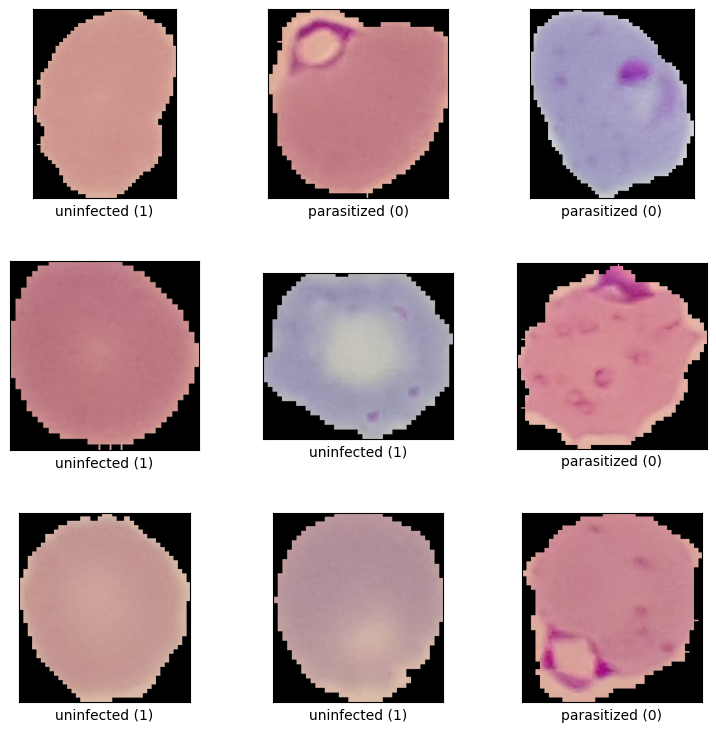

In [8]:
# print out some of the images of the cells
malaria_examples = tfds.visualization.show_examples(malaria_ds, malaria_info)

## Visualize the modified images out of 16 random images in the modified train set


## Data Exploration

### Into Train, test and validation sets which we will use in our model in the ratio 75:15:10

In [11]:
batch_size = 32
image_size = [200, 200]

# split the datasets into train, validation and test sets in the ratio 75:15:10
malaria_train_ds, malaria_val_ds, malaria_test_ds = tfds.load(
    'malaria',
    split=['train[:75%]', 'train[75%:90%]', 'train[90%:]'],
    shuffle_files=True, as_supervised=True
)

In [12]:
num_train_mages = tf.data.experimental.cardinality(malaria_train_ds).numpy()
print("Total training images: " + str(num_train_mages ))

num_val_mages = tf.data.experimental.cardinality(malaria_val_ds).numpy()
print("Total validating images: " + str(num_val_mages ))

num_test_mages = tf.data.experimental.cardinality(malaria_test_ds).numpy()
print("Total testing images: " + str(num_test_mages ))


Total training images: 20668
Total validating images: 4134
Total testing images: 2756


### Class Distribution
#### See the number of images per class

In [13]:
def get_classes_distribution(data):
    # Create a dictionary for each type of label
    labels = {0: "parasitized", 1: "uninfected"}

    # Initialize an empty dictionary to store label counts
    label_counts = {}

    # Iterate through the dataset and count the occurrences of each label
    for image, label in data:
        label_name = labels[label.numpy()]
        if label_name in label_counts:
            label_counts[label_name] += 1
        else:
            label_counts[label_name] = 1

    # Get total number of samples
    total_samples = len(data)

    # Print the distribution of classes
    for label, count in label_counts.items():
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {:.2f}%".format(label, count, percent))

# Call the function with the malaria training dataset
get_classes_distribution(malaria_train_ds)



uninfected          :   10342 or 50.04%
parasitized         :   10326 or 49.96%


In [12]:
# class Distribution in the test data
get_classes_distribution(malaria_test_ds)

uninfected          :   1385 or 50.25%
parasitized         :   1371 or 49.75%


## Plot the class Distribution of both test and train data

In [14]:
import seaborn as sns
import pandas as pd

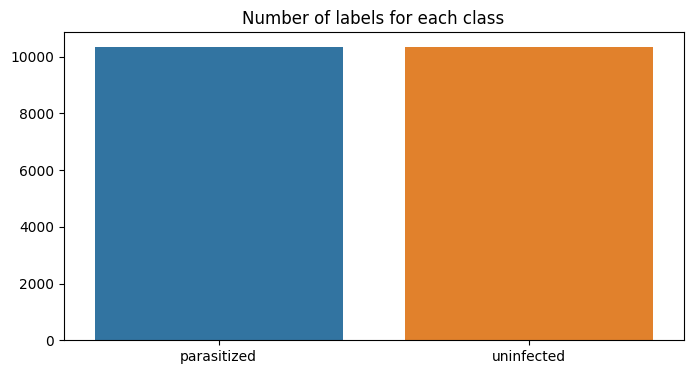

In [14]:
def plot_label_per_class(data):
    # Extract labels and convert them to a list
    labels = [label.numpy() for _, label in data]

    # Define class names
    class_names = ["parasitized", "uninfected"]

    # Calculate label counts
    label_counts = [labels.count(i) for i in range(len(class_names))]

    # Plotting
    f, ax = plt.subplots(1, 1, figsize=(8, 4))  # Reduced figure size
    g = sns.barplot(x=class_names, y=label_counts)
    g.set_title("Number of labels for each class")
    plt.show()

# Call the function with the malaria training dataset
plot_label_per_class(malaria_train_ds)


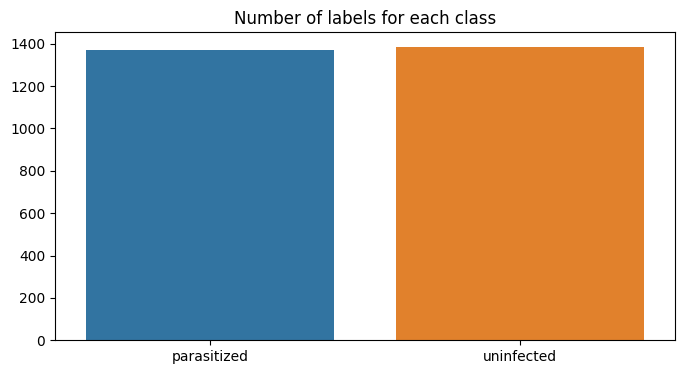

In [15]:
plot_label_per_class(malaria_test_ds)

### Visulaize sample images from the train and test sets

In [16]:
for image, label in malaria_train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (103, 103, 3)
Label:  0


## Resize Image to a uniform scale

### From the Images shown above on the visualization sector, it is clear that the images are of different sizes.  This section will crop big images and padd the small images. Using pad() and .map() functions

In [15]:
def convert(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label

def pad(image,label):
  image,label = convert(image, label)
  image = tf.image.resize_with_crop_or_pad(image, 150, 150)
  return image,label

In [16]:
# train set modified
mod_train_ds = (
    malaria_train_ds
    .cache()
    .map(pad)
)

# validation set modified
mod_val_ds = (
    malaria_val_ds
    .cache()
    .map(pad)
)

# validation set modified
mod_test_ds = (
    malaria_test_ds
    .cache()
    .map(pad)
)

In [17]:
for image, label in mod_train_ds.take(1):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())


Image shape:  (150, 150, 3)
Label:  1


### Visualize the images in the train dataset

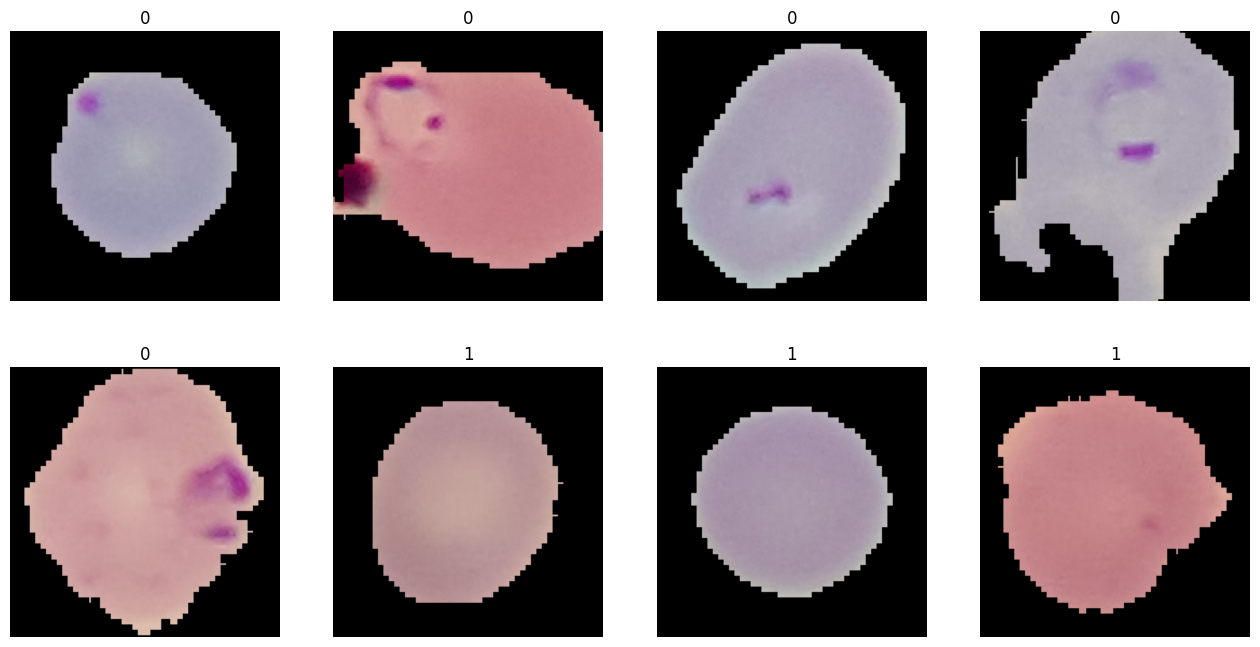

In [18]:
# Sample images and labels from the modified training dataset
sample_images = []
sample_labels = []

for image, label in mod_train_ds.take(8):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# Plot the sampled images
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
for i, img in enumerate(sample_images):
    ax[i//4, i%4].imshow(img)
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title(sample_labels[i])
plt.show()




### Visualize the images in the train dataset

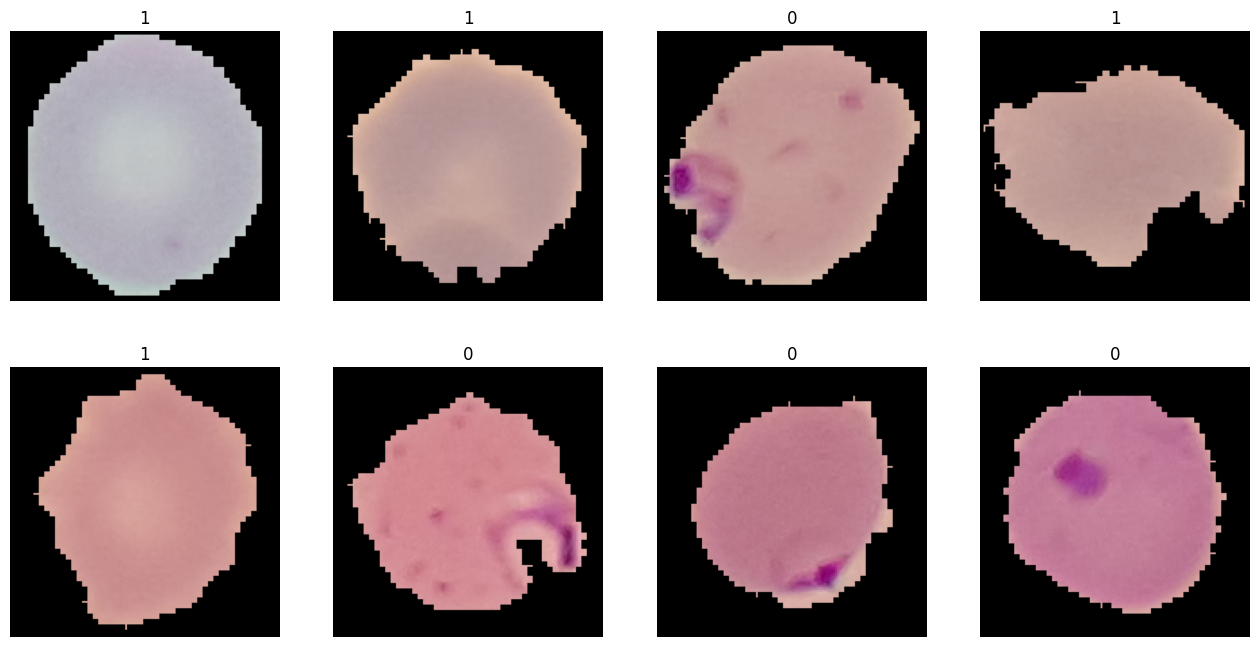

In [21]:
# Sample images and labels from the modified training dataset
sample_images = []
sample_labels = []

for image, label in mod_test_ds.take(8):
    sample_images.append(image.numpy())
    sample_labels.append(label.numpy())

# Plot the sampled images
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
for i, img in enumerate(sample_images):
    ax[i//4, i%4].imshow(img)
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title(sample_labels[i])
plt.show()

## Data Preprocessing

### Libraries

In [19]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.utils import plot_model

from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import seaborn as sns

### Feature Extraction

#### SEperate images and labels in the datset
- Split data into 70:15:15 test, train and validation sets
- X represent features(images)
- y represents classes/labels

In [20]:
X = []
y = []
for image, label in mod_train_ds:
    X.append(image.numpy())
    y.append(label.numpy())

# Split the data into train_full and test sets (15% test)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split the train_full set into train and validation sets (15% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state=42)

#### Normalise the split dataset by /255 

In [21]:
#images/features
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0
X_test = np.array(X_test) / 255.0

# Labels
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [22]:
# print the shapes of the train set
print("The model performance for training set")
print("--------------------------------------")
print('The shape of X_train is:',X_train.shape)
print("\n")

# print the shapes of the train set
print("The model performance for training set")
print("--------------------------------------")
print('The shape of y_train is:',y_train.shape)
print("\n")

# print the shapes of the train set
print("The model performance for training set")
print("--------------------------------------")
print('The shape of X_test is:',X_test.shape)
print("\n")

# print the shapes of the train set
print("The model performance for training set")
print("--------------------------------------")
print('The shape of y_test is:',y_test.shape)
print("\n")

# print the shapes of the train set
print("The model performance for training set")
print("--------------------------------------")
print('The shape of X_val is:',X_val.shape)
print("\n")

# print the shapes of the train set
print("The model performance for training set")
print("--------------------------------------")
print('The shape of y_val is:',y_val.shape)
print("\n")



The model performance for training set
--------------------------------------
The shape of X_train is: (14931, 150, 150, 3)


The model performance for training set
--------------------------------------
The shape of y_train is: (14931,)


The model performance for training set
--------------------------------------
The shape of X_test is: (3101, 150, 150, 3)


The model performance for training set
--------------------------------------
The shape of y_test is: (3101,)


The model performance for training set
--------------------------------------
The shape of X_val is: (2636, 150, 150, 3)


The model performance for training set
--------------------------------------
The shape of y_val is: (2636,)




# MODELS(Supervised Learning)
### Target classes(Parasitized: 0 and Uninfected:1)
 #### I will build different models and use them to come up with an ensemble model to perform prediction on the blood smears.

#### Both the train and validation sets are imbalanced in comparison to the distribution of the 'malaria' dataset

## Convolution Neural Network

### We will use the sequential model which is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage.

#### The different layers are the :
- 2D Convolution layer
- Maxpooling layer which will be used for feature extraction(reduce spatial dimensions)
- Flatten : this will act as our input
- Dense : Which will act as the output layer
- Finally, we will use optimizers to help improve the accuracy of the model and reduce the losses.

In [56]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [57]:
def build_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.Input(shape=(150, 150, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return cnn_model

In [58]:
cnn_model = build_model()

cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [59]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_28 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 sequential_1 (Sequential)   (None, 37, 37, 32)        2160      
                                                                 
 sequential_2 (Sequential)   (None, 18, 18, 64)        7392      
                                                                 
 sequential_3 (Sequential)   (None, 9, 9, 128)         27072     
                                                      

## Callbacks

##### We need to define some hyper parameters including the learning rates, in order to design a model that does not overfit. High learning rates will make the model slow, therefore, I will approach the exponential approach. In this type of approach, our learning rate will be changing with each epoch.

In [60]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("malaria_classification_model.h5",
                                                    save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

#specifies the exponential function with the initial learning rate(lr0) and the decay para,eter(s)

def exponential_decay(lr0, s): 
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)


### Training

In [61]:
malaria_train_model = cnn_model.fit(
    X_train, y_train,
    epochs=no_epochs,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler]
)



Epoch 1/5
467/467 [==============================] - 1843s 4s/step - loss: 0.6802 - accuracy: 0.5998 - val_loss: 9.4372 - val_accuracy: 0.4920 - lr: 0.0100
Epoch 2/5
467/467 [==============================] - 1648s 4s/step - loss: 0.6447 - accuracy: 0.6432 - val_loss: 1.0229 - val_accuracy: 0.5224 - lr: 0.0089
Epoch 3/5
467/467 [==============================] - 1620s 3s/step - loss: 0.6399 - accuracy: 0.6468 - val_loss: 0.6956 - val_accuracy: 0.5303 - lr: 0.0079
Epoch 4/5
467/467 [==============================] - 1644s 4s/step - loss: 0.6330 - accuracy: 0.6520 - val_loss: 0.6922 - val_accuracy: 0.5080 - lr: 0.0071
Epoch 5/5
467/467 [==============================] - 1650s 4s/step - loss: 0.4404 - accuracy: 0.7941 - val_loss: 1.1794 - val_accuracy: 0.4962 - lr: 0.0063


In [62]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 conv2d_28 (Conv2D)          (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 sequential_1 (Sequential)   (None, 37, 37, 32)        2160      
                                                                 
 sequential_2 (Sequential)   (None, 18, 18, 64)        7392      
                                                                 
 sequential_3 (Sequential)   (None, 9, 9, 128)         27072     
                                                      

In [63]:
cnn_model.evaluate(X_test, y_test)

97/97 [==============================] - 131s 1s/step - loss: 1.1925 - accuracy: 0.4921


[1.1924573183059692, 0.4920993149280548]

In [65]:
Y_test_pred = cnn_model.predict(X_test)
Y_test_pred_labels = Y_test_pred > 0.5 
Y_test_true_labels = y_test

97/97 [==============================] - 131s 1s/step


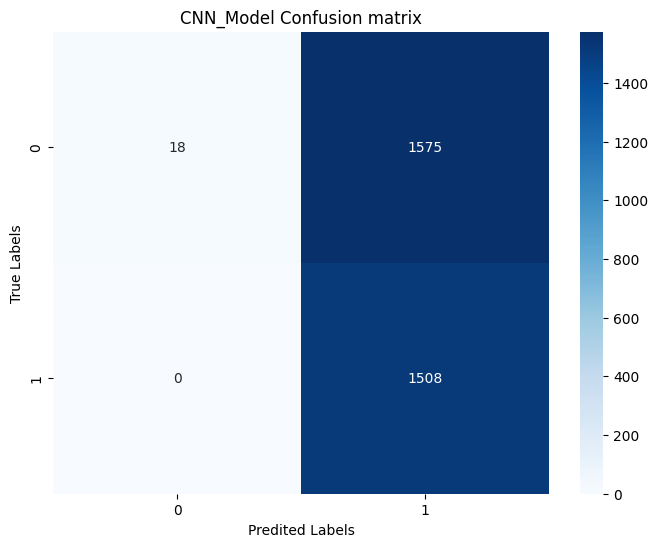

In [67]:
cnn_confusion_matrix = confusion_matrix(Y_test_true_labels, Y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cnn_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predited Labels')
plt.title('CNN_Model Confusion matrix')

# save the confusion matrix
plt.savefig('confusion_matrixV2.png')

plt.show()


### Classification report

In [68]:
cnn_report = classification_report(Y_test_true_labels, Y_test_pred_labels, digits=4)
print(cnn_report)

              precision    recall  f1-score   support

           0     1.0000    0.0113    0.0223      1593
           1     0.4891    1.0000    0.6569      1508

    accuracy                         0.4921      3101
   macro avg     0.7446    0.5056    0.3396      3101
weighted avg     0.7516    0.4921    0.3309      3101



### Graphically represent the predicted images

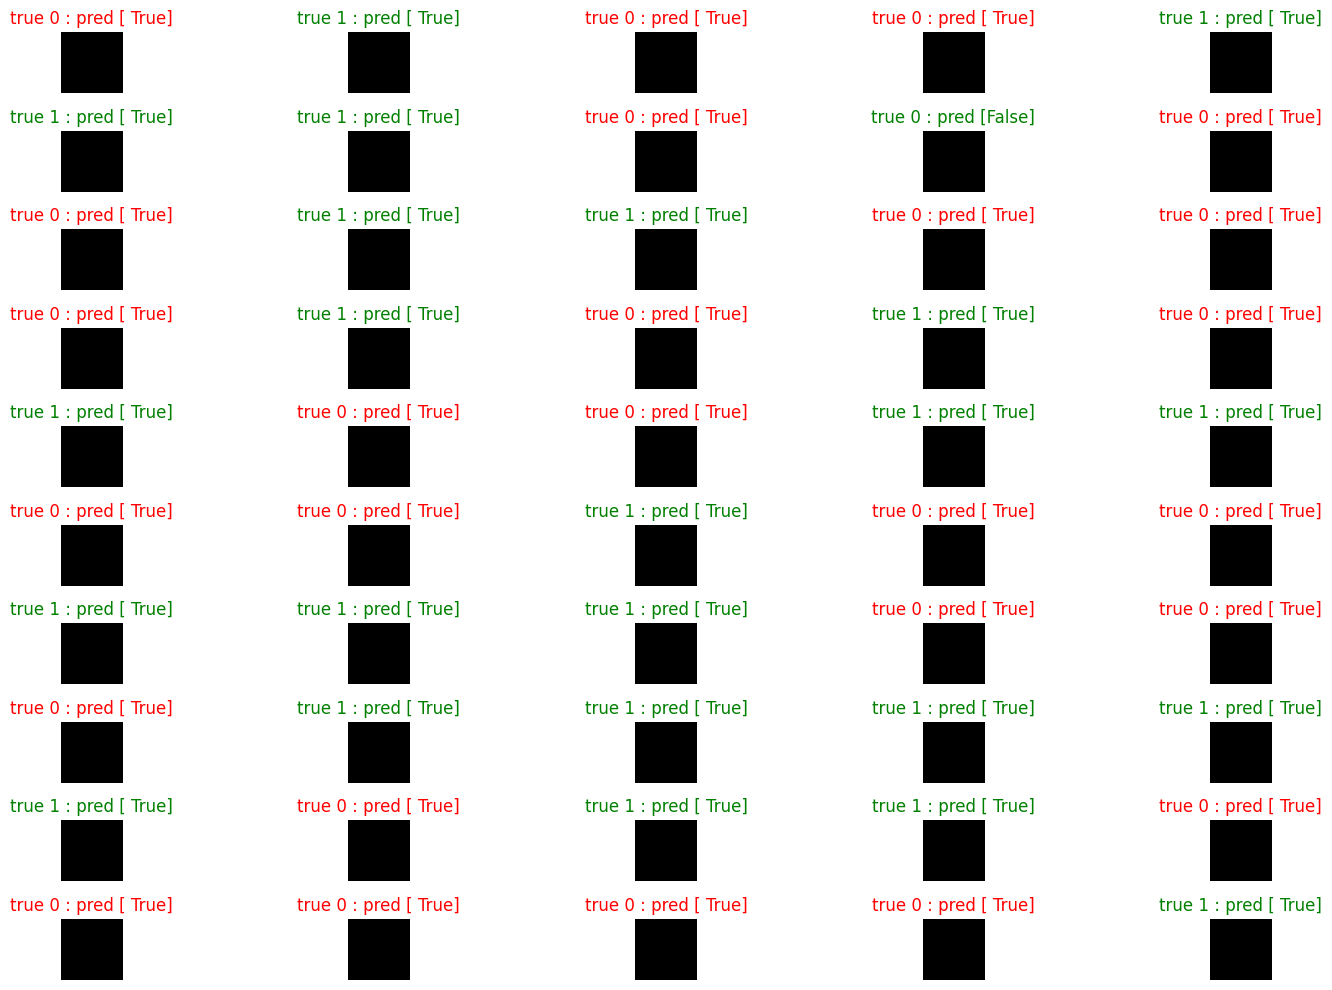

In [69]:
fig, axs = plt.subplots(10, 5, figsize=(16, 10))
axs = axs.flatten()

for ax in axs:
    r = np.random.randint(0, X_test.shape[0])
    true_label = Y_test_true_labels[r]
    pred_label = Y_test_pred_labels[r]
    title_color = 'green' if true_label == pred_label else 'red'
    ax.imshow(X_test[r], cmap="gray")
    ax.set_title('true {} : pred {}'.format(true_label, pred_label), color=title_color)
    ax.axis('off')

plt.tight_layout()

plt.savefig('predicted_outputV1.pdf')

plt.show()

## From the above the accuracy is very low, I will retrain the model with epoch = 20 and anlyse if there is an increase in accuracy


### I am using the ensembe approach, here hoping to achieve a higher accuracy.

In [24]:
# Model
v2_model = Sequential()
# Add convolution 2D
v2_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(150, 150, 3)))
v2_model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
v2_model.add(Dropout(0.25))
v2_model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
v2_model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
v2_model.add(Dropout(0.25))
v2_model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
v2_model.add(Dropout(0.4))
v2_model.add(Flatten())
v2_model.add(Dense(128, activation='relu'))
# Add dropouts to the model
v2_model.add(Dropout(0.3))
v2_model.add(Dense(categories, activation='softmax'))

In [29]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ]
    )
    
    return block

def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [30]:
def build_model():
    cnn_model = tf.keras.Sequential([
        tf.keras.Input(shape=(150, 150, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return cnn_model

In [31]:
v2_model = build_model()

v2_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [32]:
checkpoint_cb2 = tf.keras.callbacks.ModelCheckpoint("malaria_classification_model_V2.h5",
                                                    save_best_only=True)

early_stopping_cb2 = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

In [ ]:
malaria_train_model =v2_model.fit(
    X_train, y_train,
    epochs=6,
    verbose=1,
    validation_data=(X_val, y_val),
    callbacks = [checkpoint_cb2, early_stopping_cb2]
)


Epoch 1/6
467/467 [==============================] - 1971s 4s/step - loss: 0.7454 - accuracy: 0.5831 - val_loss: 1.1728 - val_accuracy: 0.5076
Epoch 2/6
390/467 [========================>.....] - ETA: 4:53 - loss: 0.3273 - accuracy: 0.8708

In [6]:
malaria_model = tf.keras.models.load_model('malaria_classification_model.h5')

In [ ]:
v2_model.summary()

### Predict the values

In [ ]:
Y_test_pred = cnn_model.predict(X_test)
Y_test_pred_labels = Y_test_pred > 0.5 
Y_test_true_labels = y_test

### Plot the confusion matrix

In [ ]:
cnnV2_confusion_matrix = confusion_matrix(Y_test_true_labels, Y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cnnV2_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('True Labels')
plt.xlabel('Predited Labels')
plt.title('CNN_Model Confusion matrix')

# save the confusion matrix
plt.savefig('confusion_matrixV2.png')

# plot it
plt.show()

In [ ]:
cnnV2_report = classification_report(Y_test_true_labels, Y_test_pred_labels, digits=4)
print(cnnV2_report)

### Visualize the predicted classes and save the output as a pdf. file

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(16, 10))
axs = axs.flatten()

for ax in axs:
    r = np.random.randint(0, X_test.shape[0])
    true_label = Y_test_true_labels[r]
    pred_label = Y_test_pred_labels[r]
    title_color = 'green' if true_label == pred_label else 'red'
    ax.imshow(X_test[r])
    ax.set_title('true {} : pred {}'.format(true_label, pred_label), color=title_color)
    ax.axis('off')

plt.tight_layout()

plt.savefig('predicted_outputV2.pdf')

plt.show()
